In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [39]:
np.random.seed(1)

def generate_data(mean, std, eps_std, n, beta0, beta1) -> pd.DataFrame:
    X = np.random.normal(mean, std, n)
    EPS = np.random.normal(0, eps_std, n)
    Y = beta0 + beta1 * X + EPS

    data = pd.DataFrame({'X': X, 'Y': Y, 'EPS': EPS})

    return data

def fit_model(model_formula: str, data: pd.DataFrame) -> sm.regression.linear_model.RegressionResultsWrapper:
    model = smf.ols(model_formula, data).fit()
    return model

def plot_results(data, title, model=None, theoretical_fit_func=None):
    plt.scatter(data['X'], data['Y'], label='Data points')

    if model is not None:
        plt.plot(data['X'], model.fittedvalues, color='red', label='Fitted line')

    if theoretical_fit_func is not None:
        x_vals = np.linspace(data['X'].min(), data['X'].max(), 100)
        y_vals = theoretical_fit_func(x_vals)
        plt.plot(x_vals, y_vals, color='green', linestyle='--', label='Theoretical fit')
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()
    plt.show()

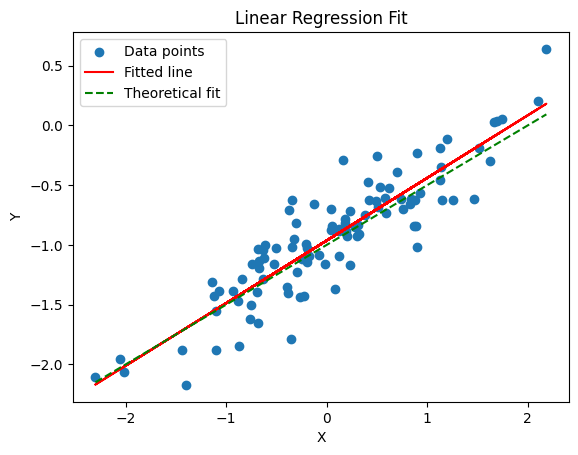

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     391.4
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           5.39e-36
Time:                        09:05:07   Log-Likelihood:                 4.1908
No. Observations:                 100   AIC:                            -4.382
Df Residuals:                      98   BIC:                            0.8288
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9632      0.023    -40.999      0.0

In [40]:
data1 = generate_data(mean=0, std=1, eps_std=0.25, n=100, beta0=-1, beta1=0.5)
model1 = fit_model('Y ~ X', data1)

plot_results(data1, 'Linear Regression Fit', model1, theoretical_fit_func=lambda x: -1 + 0.5 * x)

print(model1.summary())

In [41]:
model1_2 = fit_model('Y ~ X + I(X**2)', data1)

print(model1_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     193.8
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           1.32e-34
Time:                        09:05:27   Log-Likelihood:                 4.2077
No. Observations:                 100   AIC:                            -2.415
Df Residuals:                      97   BIC:                             5.400
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9663      0.029    -33.486      0.0

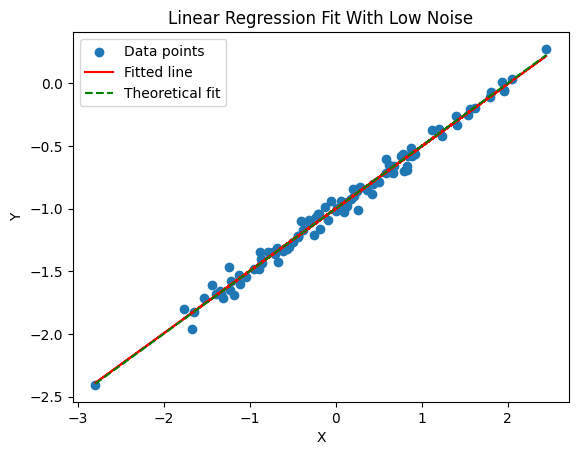

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     8662.
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           1.97e-97
Time:                        09:06:42   Log-Likelihood:                 151.58
No. Observations:                 100   AIC:                            -299.2
Df Residuals:                      98   BIC:                            -293.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0010      0.005   -186.443      0.0

In [42]:
data2 = generate_data(mean=0, std=1, eps_std=0.05, n=100, beta0=-1, beta1=0.5)
model2 = fit_model('Y ~ X', data2)

plot_results(data2, 'Linear Regression Fit With Low Noise', model2, theoretical_fit_func=lambda x: -1 + 0.5 * x)

print(model2.summary())

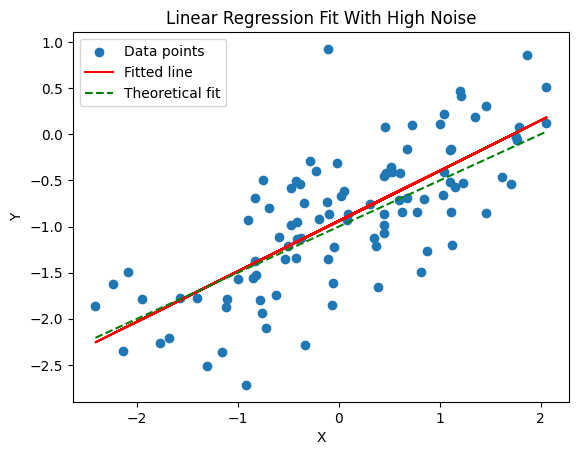

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     115.9
Date:                Thu, 20 Nov 2025   Prob (F-statistic):           2.69e-18
Time:                        09:07:03   Log-Likelihood:                -76.350
No. Observations:                 100   AIC:                             156.7
Df Residuals:                      98   BIC:                             161.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9401      0.053    -17.890      0.0

In [43]:
data3 = generate_data(mean=0, std=1, eps_std=0.5, n=100, beta0=-1, beta1=0.5)
model3 = fit_model('Y ~ X', data3)

plot_results(data3, 'Linear Regression Fit With High Noise', model3, theoretical_fit_func=lambda x: -1 + 0.5 * x)

print(model3.summary())

In [ ]:
for i, model in enumerate([model1, model2, model3], start=1):
    print(f"Model {i} coefficients and 95% confidence intervals:")
    conf_int = model.conf_int(alpha=0.05)
    for param in model.params.index:
        left, right = conf_int.loc[param]
        print(f"  {param}: {model.params[param]:.4f} in [{left:.4f}, {right:.4f}]")
    print()

Model 1 coefficients and 95% confidence intervals:
  Intercept: -0.9632 in [-1.0099, -0.9166]
  X: 0.5239 in [0.4713, 0.5764]

Model 2 coefficients and 95% confidence intervals:
  Intercept: -1.0010 in [-1.0116, -0.9903]
  X: 0.4972 in [0.4866, 0.5078]

Model 3 coefficients and 95% confidence intervals:
  Intercept: -0.9401 in [-1.0444, -0.8358]
  X: 0.5451 in [0.4446, 0.6457]

